# Modeling and basic analysis of spike trains, some bursting included
### Marco Arieli Herrera-Valdez 
### Mathematical and Biophysical Physiology,
### Facultad de Ciencias, UNAM

*Created*: Jan 1, 2016

*Last revised*: Oct 6, 2017. _Added saving argument to the function that creates bursty trains. It is now possible to save trains to .csv files_

This tutorial provides a brief description of the steps one could follow to model spike trains from the distribution of their interspike intervals, $y$. Interspike intervals can have many different distributions depending on the intrinsic properties of a neuron. The modulation of such properties by substances in the neuronal microenvironment exerts powerful effects on the distribution of interspike intervals, and on the packets of action potentials generated by the neuron. Some spike trains contain "packets" of action potentials called _bursts_. One issue that remains to be solved, is that of defining precisely what a burst is, and how to detect them from real data. 



#### Simulations in python
Now import modules that will be used to model spike trains. 

In [1]:
import scipy as sc
import matplotlib.pyplot as gr
from scipy.stats import gamma
import time
%matplotlib inline

## Gamma-distributed interspike intervals

Let $t_0$, $t_1$,... represent the times at which a given neuron fires action potentials. The interspike intervals are then defined as $u_i = t_{i+i} - t_i$, for $i=1,...,n$; define $u_0 =0$ for consistency. As a first approximation, assume that the interspike intervals are gamma distributed. Then,
\begin{eqnarray}
P(u; \alpha,\theta,u_0) 
&=& \left( \frac{u - u_0}{\theta}\right)^{\alpha -1}
\frac{e^{-\frac{u-u_0}{\theta}}}{\theta \Gamma(\alpha) }
\\
&=&\frac{u ^{\alpha -1}}{\Gamma(\alpha) }
\left( \frac{ e^{-\frac{u}{\theta}}}{ \theta^{\alpha}} \right),
\quad u_0=0
\end{eqnarray}
The parameters $\alpha$ and $\theta$ are called the _shape_ and _scale_ factors. The mode, mean, and variance for $u$ are $(\alpha -1)\theta$, $\alpha \theta$, and $\alpha \theta^2$, respectively. If he shape factor $\alpha$ equals 1, then then $P$ describes an exponential pdf. This means that the mean instantaneous firing rate for the spike train is $\left( \alpha \theta \right)^{-1}$. The parameter $u_0$ represents the minimum interspike interval.

Let $\lambda=\theta^{-1}$, then the probability density function $P$ can be rewritten as
\begin{equation}
P(u; \alpha,\lambda) = \frac{u ^{\alpha -1}}{\Gamma(\alpha) }
\lambda^{\alpha} e^{-\lambda u}
\end{equation}
where $\lambda/\alpha$ is the mean firing rate for the spike train.


### Simulations of spike trains from gamma-distributed interspike intervals

To simulate a gamma interspike interval distribution, set first a few parameters. The form of the gamma distribution used in python is like second equation above. The train is homogeneous if the mean interspike interval is constant and non-homogeneous otherwise. 

Create a function that generates a homogeneous spike train with a minimum interspike interval of 2 milliseconds for a given a mean interspike interval, and a shape factor (influences the start of the distribution) 

In [5]:
def homogeneousGammaTrains(meanISI, shape=2.0, nSpikes=100, nTrains=1):
    spikeTrains=list()
    for m in range(nTrains):
        isiSample=sc.random.gamma(shape, scale=meanISI/shape, size=(nTrains,nSpikes))
        spikeTrains.append(isiSample.cumsum(1)) 
    return spikeTrain,isiSample

def nonHomogeneousGammaTrains(meanISIs, shape=2.0, nSpikes=100, nTrains=1):
    spikeTrains=list()
    a = len(meanISIs)
    if (a!= nSpikes)&(a!=1):
        print('The length of the meanISIs array is not 1, and not equal to the number of spikes in the train')
        return
    for m in sc.arange(nTrains):
        isiSample=sc.zeros(nSpikes)
        for nn in range(nSpikes):
            isiSample[nn] = sc.random.gamma(shape, scale=meanISIs[nn]/shape, size=(1,1))
        spikeTrains.append(isiSample.cumsum())
    return spikeTrains


Now let us explore spike trains with the same mean instantaneous firing rate, but 3 different shapes for the ISI distribution. Notice the change in the spike temporal distribution. For comparison, let us calculate the entropy (a measure of disorder in bits) for each of the distributions.

In [3]:
def calcEntropy(pdf):
    ii = sc.where(pdf>0)
    return -(pdf[ii]*sc.log2(pdf[ii])).sum()

### Example: 
Three distributions with the same mean instantaneous firing rate, the same minimum interspike interval, but different shapes. 

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


P(u;2,5), var(u)=50, E(p)=458.706 bits
P(u;2,5), var(u)=50, E(p)=458.706 bits
P(u;2,5), var(u)=50, E(p)=458.706 bits
P(u;2,5), var(u)=50, E(p)=458.706 bits
P(u;2,5), var(u)=50, E(p)=458.706 bits
P(u;8,1.25), var(u)=12.5, E(p)=380.7 bits
P(u;8,1.25), var(u)=12.5, E(p)=380.7 bits
P(u;8,1.25), var(u)=12.5, E(p)=380.7 bits
P(u;8,1.25), var(u)=12.5, E(p)=380.7 bits
P(u;8,1.25), var(u)=12.5, E(p)=380.7 bits
P(u;16,0.625), var(u)=6.25, E(p)=333.849 bits
P(u;16,0.625), var(u)=6.25, E(p)=333.849 bits
P(u;16,0.625), var(u)=6.25, E(p)=333.849 bits
P(u;16,0.625), var(u)=6.25, E(p)=333.849 bits
P(u;16,0.625), var(u)=6.25, E(p)=333.849 bits
The mean instantaneous firing rate for each of the trains is 100 Hz. 
The distribution with the largest variance is the most disordered one too, as shown by the spike trains.
Notice the distribution that is most disordered is the one that seems bursty, 
even though there are no bursts there, strictly speaking. 


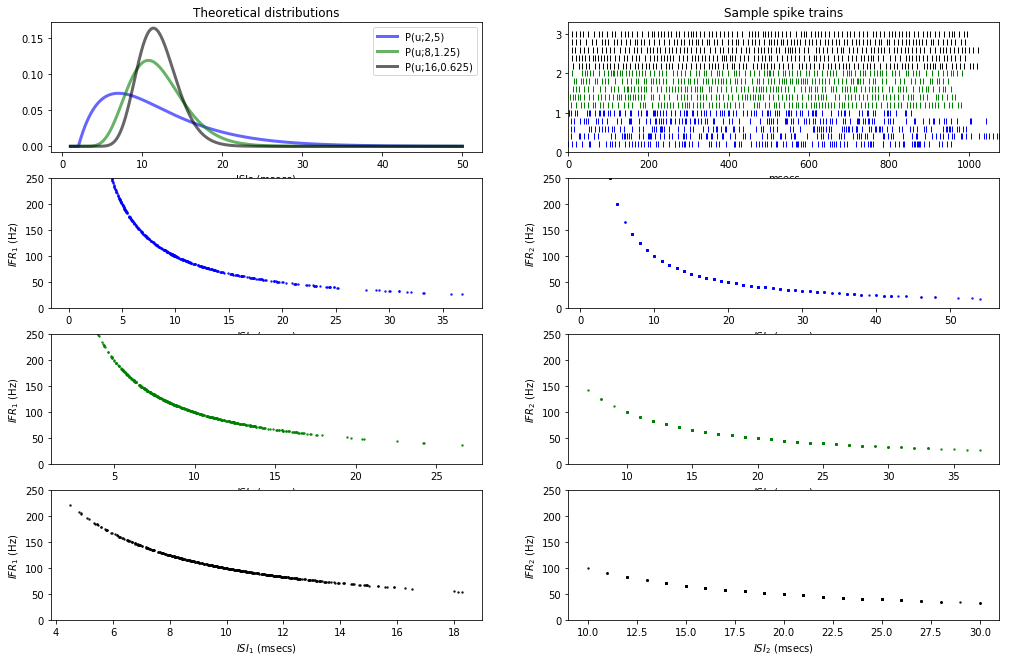

In [4]:
meanISI= 10.0; nTrains=5
shapes= sc.array([2.0, 8.0, 16.0]); scales= meanISI/shapes; u0=2.0
colors= ["b","g", "k"]
x = sc.arange(1,5*meanISI,0.01)
fig=gr.figure(figsize=(17,11)); gr.ioff()
rows=4; cols=2
axTrains= fig.add_subplot(rows,cols,2)
axPDF= fig.add_subplot(rows,cols,1)
ax1 = list(); ax2 = list()
for mm in sc.arange(1,len(shapes)+1):
    ax1.append(fig.add_subplot(rows,cols, 2*mm+1))
    ax2.append(fig.add_subplot(rows,cols, 2*mm+2))

maxSpikeTime=0
for n in sc.arange(len(shapes)):
    a=shapes[n]; s=scales[n]
    pp=gamma.pdf(x, a, scale=s, loc=u0)
    entropy = calcEntropy(pp)
    variance = a * s * s
    str0=r'P(u;%g,%g)'%(a,s)
    str1=r'P(u;%g,%g), var(u)=%g, E(p)=%g bits'%(a,s,variance,entropy)
    axPDF.plot(x, pp, colors[n], lw=3, alpha=0.6, label=str0)
    #print("The distribution with (\alpha,\theta)=(%g,%g) has an entropy of %g bits"%(a,s,entropy))
    for m in sc.arange(nTrains):
        spikeTrain,isiSample= homogeneousGammaTrains(meanISI, shape=a, nSpikes=100, nTrains=1)
        isi2order = sc.arange(len(spikeTrain[0]))
        isi2order[2:] = (spikeTrain[0][2:]-spikeTrain[0][:-2])
        #
        if n<len(shapes):
            #ax1[n].plot(x[1:], 1000/x[1:], 'k', lw=1, alpha=0.2)
            #ax2[n].plot(x[1:], 1000/x[1:], 'k', lw=1, alpha=0.2)
            ax1[n].plot(isiSample[0][1:], 1000/isiSample[0][1:], colors[n]+'.', ms=3, alpha=0.75)
            ax2[n].plot(isi2order[2:], 1000/isi2order[2:], colors[n]+'.', ms=3, alpha=0.75)
            ax1[n].set_xlabel(r"$ISI_1$ (msecs)"); ax1[n].set_ylabel(r"$IFR_1$ (Hz)"); ax1[n].set_ylim(0,250)
            ax2[n].set_xlabel(r"$ISI_2$ (msecs)"); ax2[n].set_ylabel(r"$IFR_2$ (Hz)"); ax2[n].set_ylim(0,250)
        ax1[n].legend(); ax2[n].legend()
        maxSpikeTime= sc.maximum(maxSpikeTime,spikeTrain[-1].max())
        axTrains.plot(spikeTrain, (n+0.2+ m*0.2)*sc.ones(len(spikeTrain)), "|"+ colors[n])
        print(str1)
axTrains.set_ylim(0,3.3); axTrains.set_xlim(0,maxSpikeTime); axTrains.set_xlabel("msecs"); 
axPDF.set_xlabel("ISIs (msecs)")
axTrains.set_title("Sample spike trains")
axPDF.set_title("Theoretical distributions")
axPDF.legend()
gr.ion(); gr.draw()
print("""The mean instantaneous firing rate for each of the trains is %g Hz. 
The distribution with the largest variance is the most disordered one too, as shown by the spike trains.
Notice the distribution that is most disordered is the one that seems bursty, 
even though there are no bursts there, strictly speaking. """%(1000.0/meanISI))


Notice that the variance in the interspike intervals is smaller for larger shape factors. The distribution with a larger variance is the one that yields a higher entropy.

## Bursting as composition of trains with large and small interspike intervals

Function to generate bursty trains by overlapping two spike trains: one that serves as an anchor train, the other  that contains the bursty spikes. It is assumed that the within burst instantaneous frequency is a decreasing function (spike frequency adaptation).

Notice that spike trains without bursts can be obtained using this function. One way of doing it is to set the min and max numbers of spikes to 0 and 1 respectively with the uniform distribution for the number of spikes per burst; the other way is to set the probability that there are n spikes per burst to 0 and use the binomial distribution.

In [5]:
def burstyTrain(interBurstISI=100.0, interBurstShape = 20.0, 
                burstISI=10.0, burstShape=1.0, nBursts=10, 
                pSpikesBurst=0.5, minSpikesBurst=4, maxSpikesBurst=10,nSpikesBurstDist="uniform",
                adapting=1, fileName=""):
    """
    burstyTrain creates a base spike train with mean ISI baseISI. One burst is created for each spike.
    The number of spikes per bursts is between minSpikesBurst and maxSpikesBurst.
    The interspike intervals within a burst are represented by the parameter burstISI.
    """
    #baseTrain,baseISIs= homogeneousGammaTrains(baseISI, shape=baseShape, nSpikes=nBursts, nTrains=1)
    interBurstISIs=sc.random.gamma(shape=interBurstShape, scale=interBurstISI/interBurstShape, size=(1,nBursts))[0]
    #print(baseISIs[0])
    isis = [interBurstISI*sc.rand()]
    if nSpikesBurstDist=="uniform":
        #print(minSpikesBurst,maxSpikesBurst,nBursts)
        nSp=sc.random.randint(minSpikesBurst,maxSpikesBurst,nBursts)
    elif nSpikesBurstDist=="binomial":
        nSp=sc.random.binomial(maxSpikesBurst,pSpikesBurst,nBursts)
    for n in sc.arange(nBursts):
        ns = nSp[n]
        bIsis=sc.random.gamma(shape=burstShape, scale=burstISI/burstShape, size=(1,ns))[0]
        if adapting==1:
            bIsis.sort()
        for i in bIsis:
            isis.append(i)
        isis.append(interBurstISIs[n])
    #print(sc.array(isis))
    burstyTrain= sc.array(isis).cumsum()
    str0 = "Time: %d, interBurstISI=%d, interBurstShape=%d"%(time.time(), interBurstISI,interBurstShape)
    str1 = ", burstISI=%d, burstShape=%d, nBursts=%d_pSpi"%(burstISI, burstShape, nBursts)
    str2 = ", pSpikesBurst=%d_minSpikesBurst=%d, maxSpikesBurst=%d"%(pSpikesBurst,minSpikesBurst,maxSpikesBurst)
    str3 = ", nSpikesBurstDist=%s"%nSpikesBurstDist
    if len(fileName)>0:
        path2File="./jjj/"+fileName+".csv"
        sc.savetxt(path2File, burstyTrain, delimiter=",")
        print("Saved file to %s"%path2File)
    #print(str0+str1+str2+str3)
    return burstyTrain


#### Example: A pair of bursty trains

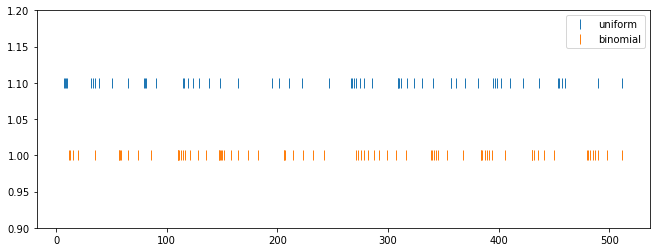

In [6]:
trU=burstyTrain(interBurstISI=20.0, interBurstShape = 10.0, 
                burstISI=5.0, burstShape=1.0, nBursts=10, pSpikesBurst=0.5, 
                minSpikesBurst=3, maxSpikesBurst=10,nSpikesBurstDist="uniform", fileName="")
trB=burstyTrain(interBurstISI=20.0, interBurstShape = 10.0, 
                burstISI=5.0, burstShape=1.0, nBursts=10, pSpikesBurst=0.7, 
                minSpikesBurst=4, maxSpikesBurst=10,nSpikesBurstDist="binomial", fileName="")
gr.figure(figsize=(11,4))
gr.plot(trU,1.1*sc.ones(len(trU)),'|',ms=10, label="uniform")
gr.plot(trB,sc.ones(len(trB)),'|',ms=10, label="binomial")
gr.ylim(0.9,1.2);gr.legend()

#### Several bursty trains with similar parameters 

In [7]:
def burstyTrains(nTrains,interBurstISI=100.0, interBurstShape = 20.0, burstISI=10.0, burstShape=1.0,nBursts=10,
                 pSpikesBurst=0.8, minSpikesBurst=4,maxSpikesBurst=10, nSpikesBurstDist="binomial",saveFiles=0):
    bT=list(); fName=""
    for n in sc.arange(nTrains):
        str0 = "Train%d_interBurstISI=%d_interBurstShape=%d"%(n, interBurstISI,interBurstShape)
        str1 = "_burstISI=%d_burstShape=%d_nBursts=%d_pSpi"%(burstISI, burstShape, nBursts)
        str2 = "_pSpikesBurst=%d_minSpikesBurst=%d_maxSpikesBurst=%d"%(pSpikesBurst,minSpikesBurst,maxSpikesBurst)
        str3 = "_nSpikesDist=%s"%nSpikesBurstDist
        if saveFiles==1:
            fName=str0+str1+str2+str3
        #print(fName)
        bT.append(burstyTrain(interBurstISI, interBurstShape, burstISI, burstShape, nBursts, 
                              pSpikesBurst, minSpikesBurst, maxSpikesBurst,nSpikesBurstDist,fileName=fName))
    return bT

Saved file to ./jjj/Train0_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurst=0_minSpikesBurst=2_maxSpikesBurst=8_nSpikesDist=uniform.csv
Saved file to ./jjj/Train1_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurst=0_minSpikesBurst=2_maxSpikesBurst=8_nSpikesDist=uniform.csv
Saved file to ./jjj/Train2_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurst=0_minSpikesBurst=2_maxSpikesBurst=8_nSpikesDist=uniform.csv
Saved file to ./jjj/Train3_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurst=0_minSpikesBurst=2_maxSpikesBurst=8_nSpikesDist=uniform.csv
Saved file to ./jjj/Train4_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurst=0_minSpikesBurst=2_maxSpikesBurst=8_nSpikesDist=uniform.csv
Saved file to ./jjj/Train5_interBurstISI=100_interBurstShape=20_burstISI=5_burstShape=2_nBursts=20_pSpi_pSpikesBurs

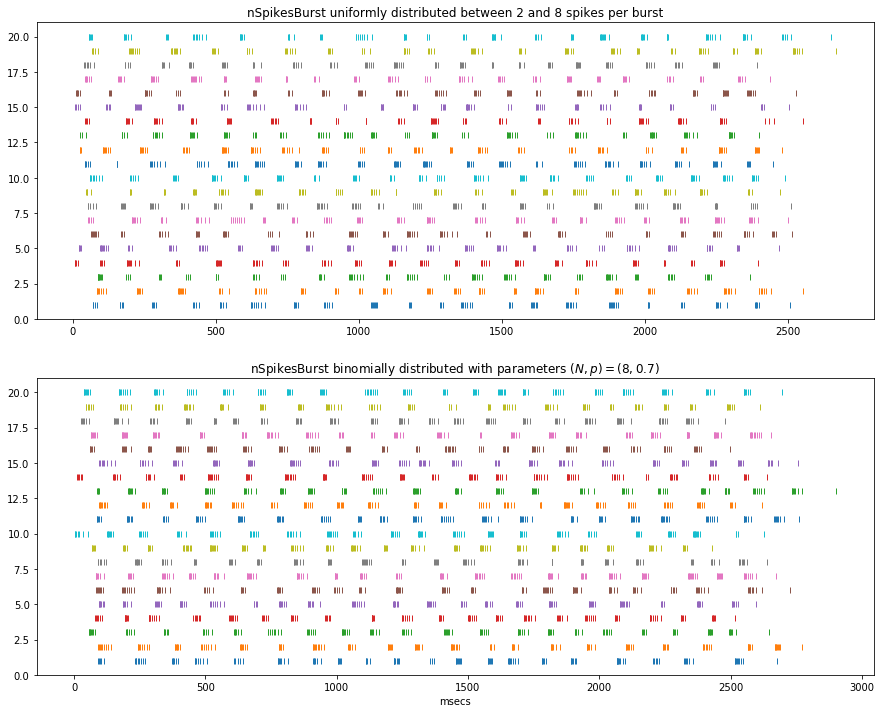

In [8]:
# Several bursts with the same parameters
#bTrain= burstyTrain(baseISI=100.0, baseShape = 20.0, burstISI=5.0, burstShape=2.0, nBursts=20.0, minSpikesBurst=1, maxSpikesBurst=8)
nT=20; minNSpB=2; maxNSpB=8; pSpB=0.7
bTs_Unif= burstyTrains(nTrains=nT,interBurstISI=100.0,interBurstShape = 20.0,
                       burstISI=5.0, burstShape=2.0, nBursts=20, pSpikesBurst=pSpB, 
                       minSpikesBurst=minNSpB, maxSpikesBurst=maxNSpB,nSpikesBurstDist="uniform",
                       saveFiles=1)
bTs_Bin= burstyTrains(nTrains=nT,interBurstISI=100.0,interBurstShape = 20.0,
                      burstISI=5.0, burstShape=2.0, nBursts=20, pSpikesBurst=pSpB, 
                      minSpikesBurst=minNSpB, maxSpikesBurst=maxNSpB,nSpikesBurstDist="binomial",
                      saveFiles=1)
ff=gr.figure(figsize=(15,12)); gr.ioff()
ax1=ff.add_subplot(211)
ax2=ff.add_subplot(212)
for n in sc.arange(nT):
    ax1.plot(bTs_Unif[n], (n+1)* sc.ones(len(bTs_Unif[n])),'|')
    ax2.plot(bTs_Bin[n], (n+1)* sc.ones(len(bTs_Bin[n])),'|')
ax1.set_ylim(0,nT+1); ax2.set_ylim(0,nT+1)
ax1.set_title("nSpikesBurst uniformly distributed between %d and %d spikes per burst"%(minNSpB, maxNSpB))
ax2.set_title("nSpikesBurst binomially distributed with parameters $(N,p)=(%d,%g)$"%(maxNSpB, pSpB))
gr.xlabel("msecs")
gr.ion(); gr.draw()

**To do**: _Characterize the interspike interval distributions from the different assumptions used for the number of spikes in a burst_ 

Let us also create functions to analyze the intervals of different orders to explore the possibility of bursting.

In [9]:
def highOrderISIs(spikeTrain,maxOrder=9):
    isis = sc.zeros((maxOrder,len(spikeTrain)),"float64")
    for n in sc.arange(maxOrder):
        isis[n][n]=spikeTrain[n]
        isis[n][n+1:]= spikeTrain[n+1:] - spikeTrain[:-n-1]
    return isis
    

#### Example: Systematic variation of the maximum number of spikes per burst
It is assumed that the number of spikes per burst behaves as a binomial random variable with parameters $N$ and $p$
specified as maxSpikesBurst and pSpikesBurst, respectively.

Saved file to ./jjj/Train0_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=3_uniform.csv
Saved file to ./jjj/Train0_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=3_binomial.csv
Saved file to ./jjj/Train1_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=4_uniform.csv
Saved file to ./jjj/Train1_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=4_binomial.csv
Saved file to ./jjj/Train2_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=5_uniform.csv
Saved file to ./jjj/Train2_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=70_minSpikesBurst=2_maxSpikesBurst=5_binomial.csv
Saved file to ./jjj/Train3_interBurstISI=50

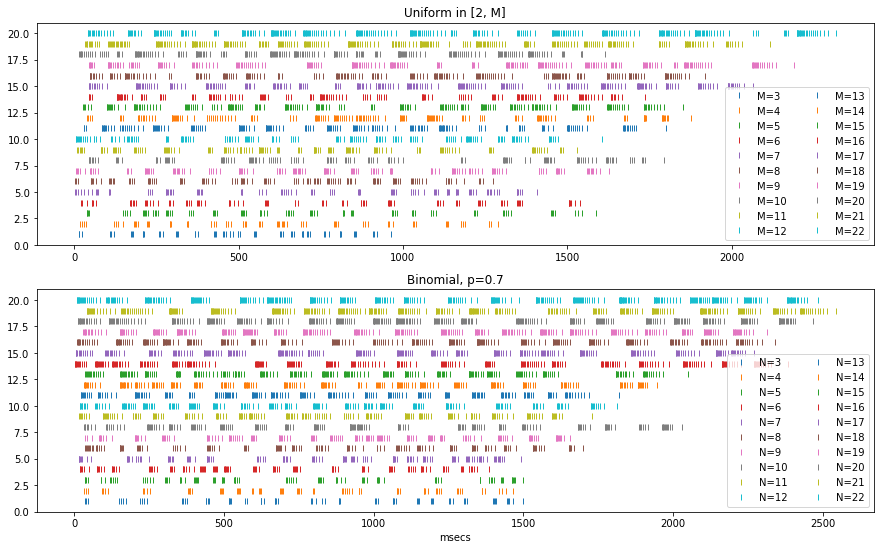

In [15]:
nT=20; minNSpB=2; pSpB=0.7; 
interBI=50; baseSh=3; interBISI=5; burstSh=2; nB=20
fff= gr.figure(figsize=(15,9)); gr.ioff()
axU= fff.add_subplot(211)
axB= fff.add_subplot(212)
trainsU=list();trainsB=list()
for n in sc.arange(0,nT):
    maxSpB= n+3
    str0 = "Train%d_interBurstISI=%d_interBurstShape=%d"%(n, interBI, baseSh)
    str1 = "_burstISI=%d_burstShape=%d_nBursts=%d"%(interBISI, burstSh, nB)
    str2 = "_pSpikesBurst=%d_minSpikesBurst=%d_maxSpikesBurst=%d"%(pSpB*100,minNSpB,maxSpB)
    fNameU=str0+str1+str2+"_uniform"
    trU= burstyTrain(interBurstISI=interBI, interBurstShape=baseSh, burstISI=interBISI, burstShape=burstSh, nBursts=nB, 
                     pSpikesBurst=pSpB, minSpikesBurst=2, maxSpikesBurst=maxSpB, nSpikesBurstDist="uniform",
                    fileName=fNameU)
    fNameB=str0+str1+str2+"_binomial"
    trB= burstyTrain(interBurstISI=interBI, interBurstShape=baseSh, burstISI=interBISI, burstShape=burstSh, nBursts=nB, 
                     pSpikesBurst=pSpB, minSpikesBurst=2, maxSpikesBurst=maxSpB, nSpikesBurstDist="binomial",
                    fileName=fNameB)
    axU.plot(trU, (n+1)* sc.ones(len(trU)),'|',label=r"M=%g"%maxSpB)
    axB.plot(trB, (n+1)* sc.ones(len(trB)),'|',label=r"M=%d"%maxSpB)
    trainsU.append(trU); trainsB.append(trB)
axU.set_ylim(0,nT+1); axB.set_ylim(0,nT+1)
axU.set_title("Uniform in [%d, M]"%(minNSpB));axB.set_title("Binomial, p=%g"%pSpB);
axU.legend(ncol=2); axB.legend(ncol=2)
gr.xlabel("msecs")
gr.ion(); gr.draw()

#### Example: Systematic variation of the probability of spiking within a burst using the binomial distribution for the number of spikes per burst 
It is assumed that the number of spikes per burst behaves as a binomial random variable with parameters $N$ and $p$
specified as maxSpikesBurst and pSpikesBurst, respectively, with increasing $p$.

Saved file to ./jjj/Train1_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=100_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train2_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=50_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train3_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=33_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train4_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=25_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train5_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=20_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train6_interBurstISI=50_interBurstShape=3_burstISI=5_burstShape=2_nBursts=20_pSpikesBurst=16_minSpikesBurst=2_maxSpikesBurst=10_binomial.csv
Saved file to ./jjj/Train7_interB

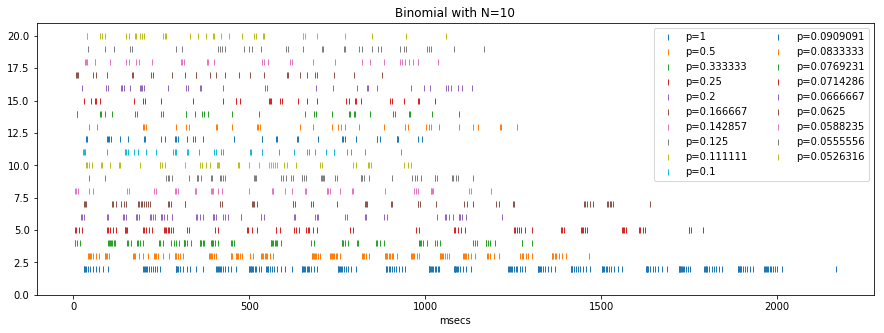

In [16]:
nT=20; minNSpB=2; pSpB=0.7; maxSpB=10 
interBI=50; baseSh=3; interBISI=5; burstSh=2; nB=20
fff= gr.figure(figsize=(15,5)); gr.ioff()
axB= fff.add_subplot(111)
trainsU=list();trainsB=list()
for n in sc.arange(1,nT):
    pSpB= 1/sc.float32(n)
    str0 = "Train%d_interBurstISI=%d_interBurstShape=%d"%(n, interBI, baseSh)
    str1 = "_burstISI=%d_burstShape=%d_nBursts=%d"%(interBISI, burstSh, nB)
    str2 = "_pSpikesBurst=%d_minSpikesBurst=%d_maxSpikesBurst=%d"%(pSpB*100,minNSpB,maxSpB)
    fNameB=str0+str1+str2+"_binomial"
    trB= burstyTrain(interBurstISI=interBI, interBurstShape=baseSh, burstISI=interBISI, burstShape=burstSh, nBursts=nB, 
                     pSpikesBurst=pSpB, minSpikesBurst=2, maxSpikesBurst=maxSpB, nSpikesBurstDist="binomial",
                    fileName=fNameB)
    axB.plot(trB, (n+1)* sc.ones(len(trB)),'|',label=r"p=%g"%pSpB)
    trainsB.append(trB)
axB.set_ylim(0,nT+1); axB.set_xlabel("msecs")
axB.set_title("Binomial with N=%d"%(maxSpB)); axB.legend(ncol=2)
gr.ion(); gr.draw()

#### Example: Plot of high order intervals vs higher order instantaneous rates
One of the spike trains from the lists above can be picked at a time and the high order interspike intervals and instantaneous rates can then be explored

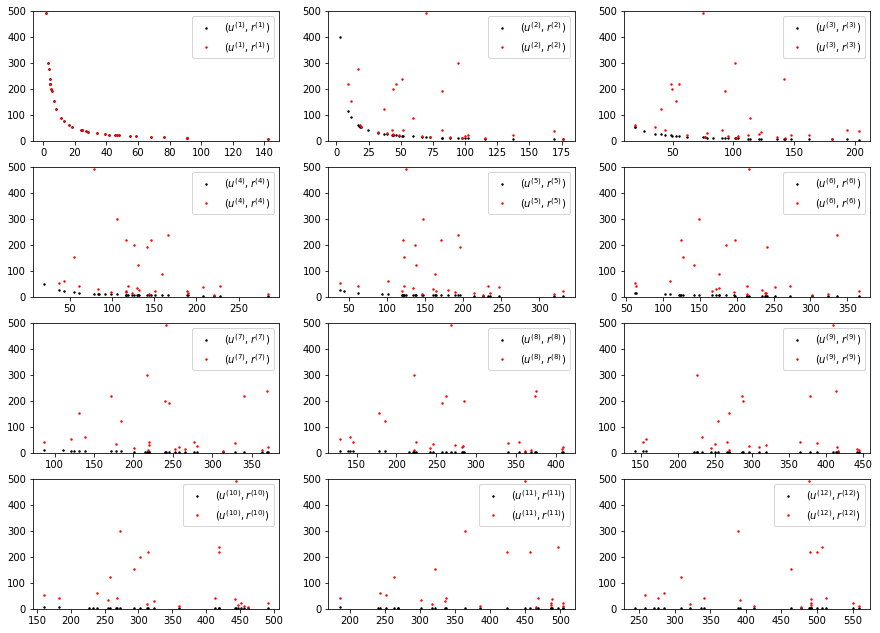

In [12]:
maxOrder=12; train= trainsB[14]
isis= highOrderISIs(train,maxOrder)
figAll= gr.figure(figsize=(15,11)); gr.ioff()
axISI=list()
cols=3; rows=sc.ceil(maxOrder/3)
u0 = isis[0]
#fig = gr.figure(figsize=(11,7))
#ax = fig.add_subplot(111, projection='3d')
for n in sc.arange(maxOrder):
    u=isis[n][n:]
    axISI.append(figAll.add_subplot(rows,cols,n+1))
    #axISI[n].plot(u,1/isis[0][n+1:], 'b.',alpha=0.35,label=r"$(r,u)$")
    #if n>0:
    axISI[n].plot(u, 1000.0/u, 'k.',ms=3,alpha=0.9,label=r"$(u^{(%d)},r^{(%d)})$"%(n+1,n+1))
    axISI[n].plot(u, 1000.0/u0[n:], 'r.',ms=3,alpha=0.9,label=r"$(u^{(%d)},r^{(%d)})$"%(n+1,n+1))
    axISI[n].legend(); #axISI[n].set_ylim()
    axISI[n].set_ylim(0,500)
    #ax.plot(n*sc.ones(len(u)),u,  1/u, '.',alpha=0.9,label=r"$(u^{(%d)},r^{(%d)})$"%(n+1,n+1))
    #ax.legend()
gr.ion(); gr.draw()